<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/3_%EC%97%B0%EB%A0%B9%EB%B3%84_%EC%9D%B8%EA%B5%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연령별 인구 현황 분석
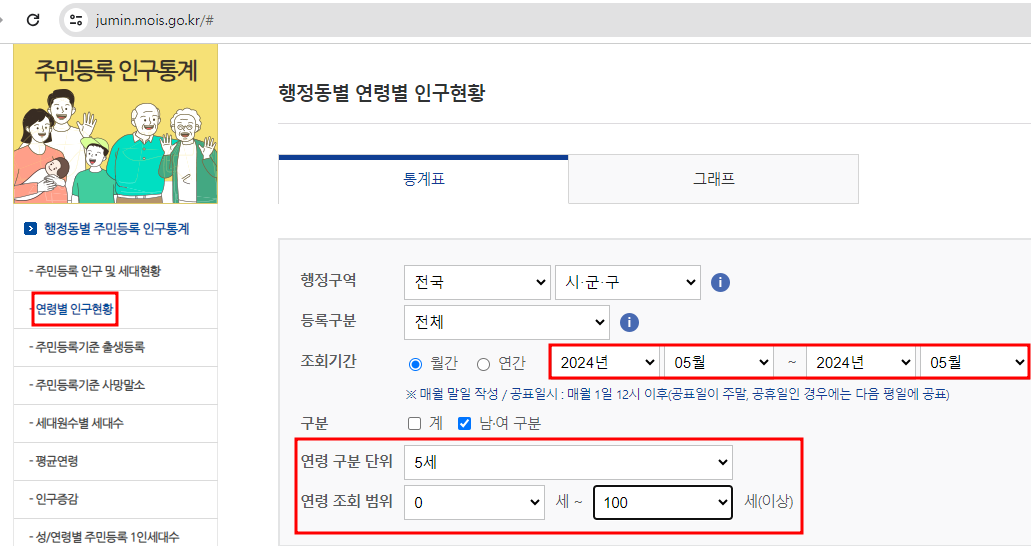


In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 데이터 수집
- https://jumin.mois.go.kr/
- skiprows : 건너뛰어야 할 행 지정
- index_col : 인덱스로 지정할 열 이름
- usecols : 엑셀에서 필요 없는 컬럼을 빼고 가져올 때

### 데이터 로드

In [ ]:
df = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/202405_연령별인구현황_월간.xlsx", skiprows=3, index_col="행정기관", usecols= "B, E:Y")
df.head()

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"665,574","997,144","1,194,325","1,188,029","1,419,803","1,757,254","1,808,492","1,622,636","2,036,765","1,943,103",...,"2,132,424","2,096,569","1,707,343","1,085,712","772,713","524,970","240,328","62,362","10,423","1,569"
서울특별시,"106,522","149,781","181,415","191,270","256,356","377,241","394,395","321,703","361,432","332,717",...,"346,532","336,724","289,817","194,253","145,099","98,771","42,281","10,700","2,025",355
부산광역시,"37,587","59,226","69,032","65,763","86,710","102,643","106,308","94,701","125,135","116,767",...,"129,260","138,036","126,561","86,664","60,470","39,238","15,731","3,615",554,66
대구광역시,"28,921","46,403","54,590","54,868","68,451","76,445","79,090","70,664","87,114","86,774",...,"101,148","98,558","78,676","52,497","35,269","25,009","11,130","2,729",363,37
인천광역시,"41,978","60,206","70,726","68,781","81,090","104,654","114,883","102,906","128,089","117,911",...,"125,175","126,290","96,038","55,694","38,676","24,335","10,848","2,823",537,96


###  남, 여 데이터 프레임 생성
#### [실습] 남자 데이터 가져오기

In [ ]:
df_man = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/202405_연령별인구현황_월간.xlsx", skiprows=3, index_col="행정기관", usecols= "B, E:Y")
df_man.head()

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"665,574","997,144","1,194,325","1,188,029","1,419,803","1,757,254","1,808,492","1,622,636","2,036,765","1,943,103",...,"2,132,424","2,096,569","1,707,343","1,085,712","772,713","524,970","240,328","62,362","10,423","1,569"
서울특별시,"106,522","149,781","181,415","191,270","256,356","377,241","394,395","321,703","361,432","332,717",...,"346,532","336,724","289,817","194,253","145,099","98,771","42,281","10,700","2,025",355
부산광역시,"37,587","59,226","69,032","65,763","86,710","102,643","106,308","94,701","125,135","116,767",...,"129,260","138,036","126,561","86,664","60,470","39,238","15,731","3,615",554,66
대구광역시,"28,921","46,403","54,590","54,868","68,451","76,445","79,090","70,664","87,114","86,774",...,"101,148","98,558","78,676","52,497","35,269","25,009","11,130","2,729",363,37
인천광역시,"41,978","60,206","70,726","68,781","81,090","104,654","114,883","102,906","128,089","117,911",...,"125,175","126,290","96,038","55,694","38,676","24,335","10,848","2,823",537,96


#### [실습] 여자 데이터 가져오기

In [ ]:
df_woman = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/202405_연령별인구현황_월간.xlsx", skiprows=3, index_col="행정기관", usecols= "B, AB:AV")
df_woman.head()

,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"634,069","947,918","1,132,554","1,117,619","1,312,931","1,600,615","1,629,424","1,524,541","1,961,063","1,886,107",...,"2,114,411","2,120,204","1,801,740","1,227,132","956,354","813,019","501,377","195,715","46,461","7,177"
서울특별시,"100,850","142,722","171,818","184,934","292,376","414,786","391,894","323,678","366,327","342,706",...,"361,856","365,803","331,360","230,038","181,317","133,512","73,384","27,542","7,093","1,149"
부산광역시,"35,575","56,560","65,371","62,768","82,727","97,340","98,134","90,678","121,970","114,754",...,"138,551","154,009","143,784","102,792","76,590","58,458","31,646","11,153","2,825",370
대구광역시,"27,230","44,137","51,975","51,223","61,510","68,847","68,440","62,497","88,266","88,519",...,"106,315","105,929","87,517","63,700","46,991","40,353","22,963","8,326","1,762",224
인천광역시,"39,798","57,387","66,929","65,416","76,076","96,967","104,338","95,357","120,405","112,010",...,"128,913","127,417","100,587","61,328","47,414","37,863","23,571","9,699","2,481",401


### 데이터 탐색

In [ ]:
# 행, 열 확인

df_man.shape, df_woman.shape

((18, 21), (18, 21))

In [ ]:
# 전체 컬럼명, 데이터 타입 확인
df_man.info()
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   0~4세     18 non-null     object
 1   5~9세     18 non-null     object
 2   10~14세   18 non-null     object
 3   15~19세   18 non-null     object
 4   20~24세   18 non-null     object
 5   25~29세   18 non-null     object
 6   30~34세   18 non-null     object
 7   35~39세   18 non-null     object
 8   40~44세   18 non-null     object
 9   45~49세   18 non-null     object
 10  50~54세   18 non-null     object
 11  55~59세   18 non-null     object
 12  60~64세   18 non-null     object
 13  65~69세   18 non-null     object
 14  70~74세   18 non-null     object
 15  75~79세   18 non-null     object
 16  80~84세   18 non-null     object
 17  85~89세   18 non-null     object
 18  90~94세   18 non-null     object
 19  95~99세   18 non-null     object
 20  100세 이상  18 non-null     object
dtypes: object(21)
memory usage: 3.1+ KB


In [ ]:
# 앞에 있는 데이터 3 개 가져오기

df_man.head(3)
df_woman.head(3)

In [ ]:
df_woman.tail(2)

### 데이터 전처리

In [ ]:
# , 제거

data = {
    "name":["홍길동", "김수정", "이민정"],
    "age":["25","35","45"]
}

df = pd.DataFrame(data)
df

,name,age
0,홍길동,25
1,김수정,35
2,이민정,45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [ ]:
df["age1"] = df["age"].astype("int64")
df.info()

In [ ]:
df.loc[1,"age"] = np.nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     2 non-null      object
 2   age1    3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [ ]:
df

,name,age,age1
0,홍길동,25,25
1,김수정,NaN,35
2,이민정,45,45


In [ ]:
# 타입 변경
# astype("변경할타입") : 데이터에 NaN이 존재한다면 int형 변경 불가
# pd.to_numeric() : 데이터에 NaN 존재 시 float로 변경함

# df["age2"] = df["age"].astype("float64")
df["age3"] = pd.to_numeric(df["age"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   age     2 non-null      object 
 2   age1    3 non-null      int64  
 3   age2    2 non-null      float64
 4   age3    2 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 248.0+ bytes


In [ ]:
# ',' 때문에 타입변환 둘 다 안됨 ==> ',' 제거 후 타입변환 필요
# df_man["30~34세"].astype("int64")
# pd.to_numeric(df_man["30~34세"])

# df_man["30~34세"].str.replace(",","").astype("int64")

# 전체 칼럼에 동일한 작업하려면 : apply(함수), map(), applymap()
df_man = df_man.apply(lambda x : x.str.replace(",", "").astype("int64"), axis=1)
df_woman = df_woman.apply(lambda x : x.str.replace(",", "").astype("int64"), axis=1)

In [ ]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   0~4세.1     18 non-null     int64
 1   5~9세.1     18 non-null     int64
 2   10~14세.1   18 non-null     int64
 3   15~19세.1   18 non-null     int64
 4   20~24세.1   18 non-null     int64
 5   25~29세.1   18 non-null     int64
 6   30~34세.1   18 non-null     int64
 7   35~39세.1   18 non-null     int64
 8   40~44세.1   18 non-null     int64
 9   45~49세.1   18 non-null     int64
 10  50~54세.1   18 non-null     int64
 11  55~59세.1   18 non-null     int64
 12  60~64세.1   18 non-null     int64
 13  65~69세.1   18 non-null     int64
 14  70~74세.1   18 non-null     int64
 15  75~79세.1   18 non-null     int64
 16  80~84세.1   18 non-null     int64
 17  85~89세.1   18 non-null     int64
 18  90~94세.1   18 non-null     int64
 19  95~99세.1   18 non-null     int64
 20  100세 이상.1  18 non-null     int64
dtypes: int64(21)


In [ ]:
df_woman.index = df_man.index.str.strip()
df_woman.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'],
      dtype='object', name='행정기관')

In [ ]:
# df_woman 컬럼명 수정
df_woman.columns = df_woman.columns.str.replace(".1","")

In [ ]:
df_man.iloc[0]

0~4세        665574
5~9세        997144
10~14세     1194325
15~19세     1188029
20~24세     1419803
25~29세     1757254
30~34세     1808492
35~39세     1622636
40~44세     2036765
45~49세     1943103
50~54세     2269255
55~59세     2132424
60~64세     2096569
65~69세     1707343
70~74세     1085712
75~79세      772713
80~84세      524970
85~89세      240328
90~94세       62362
95~99세       10423
100세 이상       1569
Name: 전국, dtype: int64

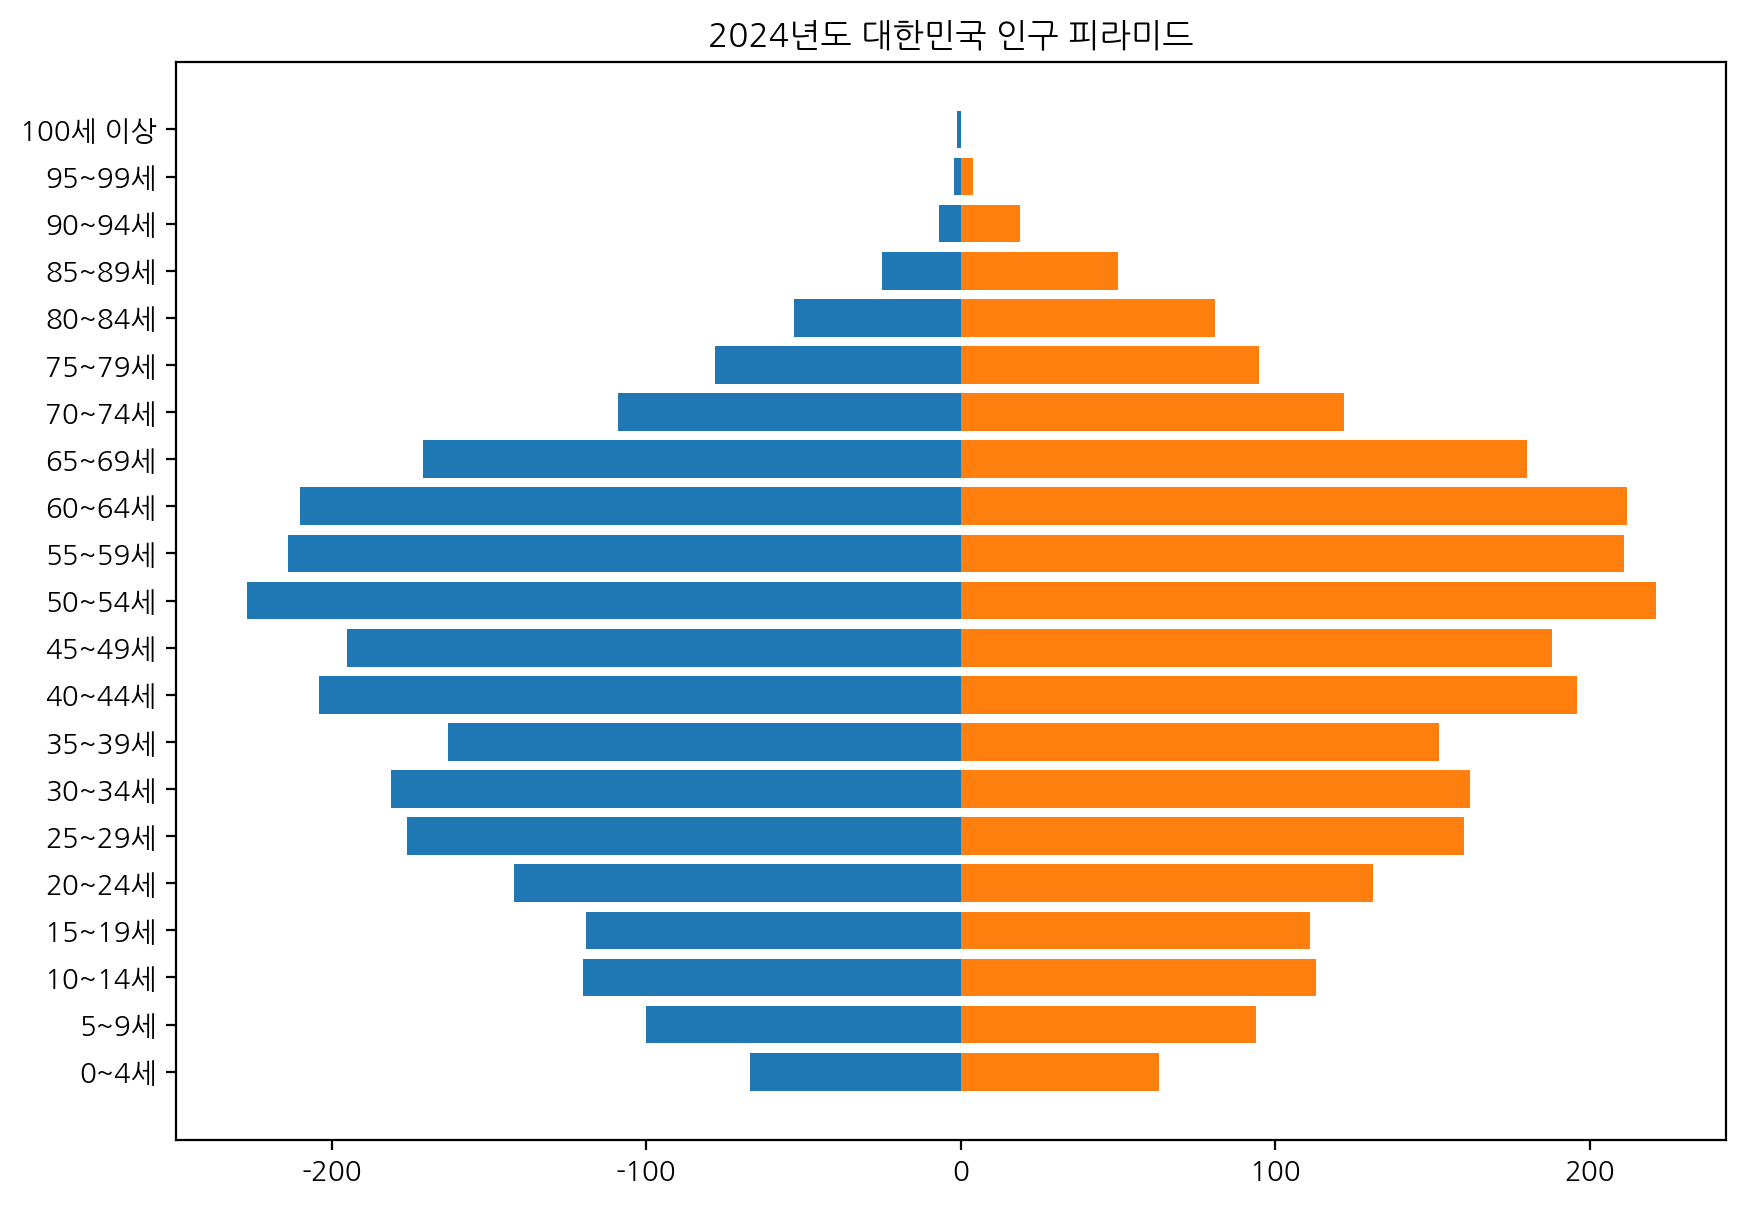

In [ ]:
plt.figure(figsize=(10,7))

plt.barh(y=df_man.columns, width= -df_man.iloc[0] // 10000)
plt.barh(y=df_woman.columns, width=df_woman.iloc[0] // 10000)
plt.title("2024년도 대한민국 인구 피라미드");